# *Sales Data Cleaning, Analysis Using Python and SQL*
# *Introduction:* 
In this notebook, we aim to clean and analyze a sales dataset that simulates real-world scenarios often encountered in sales management systems. The dataset represents messy sales data with inconsistencies, missing values, duplicates, and invalid entries. Performing exploratory data analysis (EDA) to understand sales trends. Cleaning and standardizing this data is critical for accurate analysis and deriving actionable business insights.dations.


# *Dataset Overview*


* Source: A simulated sales dataset.

* Structure: The dataset contains 9 columns:
  * Order_ID: Unique identifier for each sales transaction.
  * Customer_Name: Name of the customer (may include duplicates and inconsistencies).
  * Product: The product sold (may have missing values).
  * Quantity_Sold: Number of units sold (may contain negative values)
  * Price: The price per unit (may contain missing or invalid values).
  * Date: The date of the order (may include invalid dates).
  * City: The city  (may contain missing values). 
  * State: The state  (may contain missing values). 
  * Country: Country (may contains inconsistent representations).

Challenges:
* Identifying and removing duplicates and fixing negative or invalid data.
* Handling missing values in Customer_Name, Quantity_sold,Price and Date.
* Standardizing inconsistent data formats in Country values and Customer_Name.
* Exploratory Data Analysis (EDA)and creating graph from cleaned data


# *Goals*

Clean the Data:
* Remove duplicates to ensure accurate analysis.
* Handle missing and invalid values in Customer_Name, Price, and Order_Date.
* Standardize text fields like Customer_Name and Country for consistency.

Transform the Data:
* Convert sales data into a clean data, standardized dataset.
* Store the cleaned data in a structured database table (clean_sales_data).

Analyze Key Metrics:
* Identify trends such as top-selling products, total revenue, and sales distribution by country.
* Provide actionable insights based on the cleaned data.
* Analze the data and create graph

# *Key Insights*

Top-Selling Products:
* USB Cable is the top-selling product with a quantity of 200 units sold.
* Other high-selling products include Mouse (50 units), Router (50 units), and Docking (45 units).

Revenue Analysis:
* Products like Laptop and Phone generate the highest revenue due to their higher prices, despite lower quantities sold.

Data Quality Issues:
* Missing Values:
  * Customer names are missing in multiple entries.
  * Products, quantities sold, prices, and dates also contain null values.

Invalid Data:
* One record contains an invalid date ("INVALID").
* Text inconsistencies are evident in the Country column with entries like "India," "INDIA," and "in."

Incorrect Text:
* Some product names contain typos or incorrect formatting (e.g., "Headphon e," "KeyBaord").

Regional Sales:
* Most sales are from cities in India, with major contributors like Delhi, Mumbai, and Kolkata.
* Country inconsistencies make regional aggregation challenging without cleaning.

Duplicate Patterns:
* Potential duplicates in customer names (e.g., case sensitivity or missing details) can lead to overcounting or misidentification.



# *Python code to generate a CSV file named sale_data*


In [1]:
#Python code to crate CSV File

import csv

# Define the sales data
data = [
    ["Order_ID", "Customer_Name", "Product", "Quantity_Sold", "Price", "Date", "City", "State", "Country"],
    [1, "Rahul Kumar", "Laptop", 10, 55000, "01-11-2024", "Delhi", "Delhi", "India"],
    [2, "Priya Sharma", "Phone", 20, 15000, "02-11-2024", "Mumbai", "Maharashtra", "India"],
    [3, "", "", "", 7000, "03-11-2024", "Chennai", "Tamil Nadu", "IN"],
    [4, "Anjali Reddy", "Headphone", 30, "", "04-11-2024", "Jaipur", "Rajasthan", "India"],
    [5, "Aman Verma", "Mouse", 50, 1000, "05-11-2024", "Kolkata", "West Bengal", "India"],
    [6, "Meera Iyer", "Keyboard", 40, 1500, "06-11-2024", "Hyderabad", "Telangana", "India"],
    [7, "Rajesh Singh", "", 25, 8000, "", "Pune", "Maharashtra", "India"],
    [8, "Sunil Patel", "Printer", "", 8000, "08-11-2024", "Delhi", "Delhi", "India"],
    [9, "Rina Bhatia", "Speaker", 28, "", "09-11-2024", "Mumbai", "Maharashtra", "India"],
    [10, "", "Camera", 18, 16000, "10-11-2024", "Chennai", "Tamil Nadu", "India"],
    [11, "Kiran Verma", "Charger", "", "", "11-11-2024", "Bangalore", "Karnataka", "India"],
    [12, "Neha Agarwal", "USB Cable", 200, 500, "12-11-2024", "Kolkata", "West Bengal", "India"],
    [13, "Ravi Prasad", "", 40, 3500, "13-11-2024", "Hyderabad", "Telangana", "India"],
    [14, "Seema Rathi", "Router", 50, 2000, "14-11-2024", "Kochi", "Kerala", "India"],
    [15, "", "Webcam", 60, 1500, "15-11-2024", "Gurgaon", "Haryana", "IN"],
    [16, "Deepa Iyer", "Hard Drive", 70, "", "16-11-2024", "Mumbai", "Maharashtra", "India"],
    [17, "Harish Rao", "Earbuds", 25, 500, "17-11-2024", "Chennai", "Tamil Nadu", "IN"],
    [18, "Priya Yadav", "Projector", 30, 5000, "", "Lucknow", "Uttar Pradesh", "India"],
    [19, "Aman Soni", "Docking", 45, 7000, "19-11-2024", "Kolkata", "West Bengal", ""],
    [20, "", "Microphone", "", 1000, "", "", "", ""]
]

# Write to a CSV file
with open("sales_data.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(data)

print("CSV file 'sales_data.csv' created successfully.")


CSV file 'sales_data.csv' created successfully.


In [2]:
# #Step 1: Install ipython-sql
!pip install ipython-sql

In [4]:
#Load the sql extension in Jupyter
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [6]:
#Connect to the SQLite database
%sql
%sql sqlite:///sales_data.db

 * sqlite:///sales_data.db


# *SQL query for Table Creation*

In [ ]:
%%sql
CREATE TABLE sales (
    Order_ID INT,
    Customer_Name TEXT,
    Product TEXT,
    Quantity_Sold INT,
    Price DECIMAL(10, 2),
    Date DATE,
    City TEXT,
    State TEXT,
    Country TEXT
);

# *Using Python (Pandas ans SQLAlchemy) to create database and read CSV File*

In [7]:
import pandas as pd
from sqlalchemy import create_engine

# Created a new SQLite database (file will be created locally)
engine = create_engine('sqlite:///sales_data.db')

# CSV file

file_path = '/kaggle/input/sales-data/sales_data.csv'  
df = pd.read_csv(file_path)

print("Table 'sales' has been created in SQLite database.")

Table 'sales' has been created in SQLite database.


# *Using Python (Pandas and SQLAlchemy) to load the data*

In [8]:
import pandas as pd
from sqlalchemy import create_engine

# Path to the uploaded file in Kaggle
file_path = '/kaggle/input/sales-data/sales_data.csv'  

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to verify the data
print(df.head())

# Connect to a SQLite database 
engine = create_engine('sqlite:///sales_data.db')  

# Ensure column names are clean and match the SQL table
df.columns = [col.strip() for col in df.columns]  

# Load data into a SQL table called 'sales'
df.to_sql('sales', engine, if_exists='replace', index=False)


print("Data loaded successfully!")

   Order_ID Customer_Name    Product  Quantity_Sold    Price        Date  \
0         1   Rahul Kumar     Laptop           10.0  55000.0  01-11-2024   
1         2  Priya Sharma      Phone           20.0  15000.0  02-11-2024   
2         3           NaN        NaN            NaN   7000.0  03-11-2024   
3         4  Anjali Reddy  Headphone           30.0      NaN  04-11-2024   
4         5    Aman Verma      Mouse           50.0   1000.0  05-11-2024   

      City        State Country  
0    Delhi        Delhi   India  
1   Mumbai  Maharashtra   India  
2  Chennai   Tamil Nadu      IN  
3   Jaipur    Rajasthan   India  
4  Kolkata  West Bengal   India  
Data loaded successfully!


# *Install ipython-sql sqlalchemy*

In [9]:
!pip install ipython-sql sqlalchemy

In [10]:
%%sql
SELECT * FROM sales LIMIT 20;

 * sqlite:///sales_data.db
Done.


Order_ID,Customer_Name,Product,Quantity_Sold,Price,Date,City,State,Country
1,Rahul Kumar,Laptop,10.0,55000.0,01-11-2024,Delhi,Delhi,India
2,Priya Sharma,Phone,20.0,15000.0,02-11-2024,Mumbai,Maharashtra,India
3,None,None,None,7000.0,03-11-2024,Chennai,Tamil Nadu,IN
4,Anjali Reddy,Headphone,30.0,None,04-11-2024,Jaipur,Rajasthan,India
5,Aman Verma,Mouse,50.0,1000.0,05-11-2024,Kolkata,West Bengal,India
6,Meera Iyer,Keyboard,40.0,1500.0,06-11-2024,Hyderabad,Telangana,India
7,Rajesh Singh,None,25.0,8000.0,None,Pune,Maharashtra,India
8,Sunil Patel,Printer,None,8000.0,08-11-2024,Delhi,Delhi,India
9,Rina Bhatia,Speaker,28.0,None,09-11-2024,Mumbai,Maharashtra,India
10,None,Camera,18.0,16000.0,10-11-2024,Chennai,Tamil Nadu,India


# *#  Identify Duplicates* 

In [11]:
%%sql
WITH CTE AS (
    SELECT *,
           ROW_NUMBER() OVER (
               PARTITION BY Order_ID, Customer_Name, Product, Quantity_Sold, Price, Date, City, State, Country
               ORDER BY Order_ID
           ) AS row_num
    FROM sales
)
SELECT * 
FROM sales
WHERE Order_ID IN (
    SELECT Order_ID FROM CTE WHERE row_num > 1
);

 * sqlite:///sales_data.db
Done.


Order_ID,Customer_Name,Product,Quantity_Sold,Price,Date,City,State,Country


# *Remove Duplicates*

In [12]:
%%sql
WITH CTE AS (
    SELECT *,
           ROW_NUMBER() OVER (
               PARTITION BY Order_ID, Customer_Name, Product, Quantity_Sold, Price, Date, City, State, Country
               ORDER BY Order_ID
           ) AS row_num
    FROM sales
)
DELETE FROM sales
WHERE Order_ID IN (
    SELECT Order_ID FROM CTE WHERE row_num > 1);

 * sqlite:///sales_data.db
Done.


[]

In [13]:
%%sql
SELECT * FROM sales;

 * sqlite:///sales_data.db
Done.


Order_ID,Customer_Name,Product,Quantity_Sold,Price,Date,City,State,Country
1,Rahul Kumar,Laptop,10.0,55000.0,01-11-2024,Delhi,Delhi,India
2,Priya Sharma,Phone,20.0,15000.0,02-11-2024,Mumbai,Maharashtra,India
3,None,None,None,7000.0,03-11-2024,Chennai,Tamil Nadu,IN
4,Anjali Reddy,Headphone,30.0,None,04-11-2024,Jaipur,Rajasthan,India
5,Aman Verma,Mouse,50.0,1000.0,05-11-2024,Kolkata,West Bengal,India
6,Meera Iyer,Keyboard,40.0,1500.0,06-11-2024,Hyderabad,Telangana,India
7,Rajesh Singh,None,25.0,8000.0,None,Pune,Maharashtra,India
8,Sunil Patel,Printer,None,8000.0,08-11-2024,Delhi,Delhi,India
9,Rina Bhatia,Speaker,28.0,None,09-11-2024,Mumbai,Maharashtra,India
10,None,Camera,18.0,16000.0,10-11-2024,Chennai,Tamil Nadu,India


# *Handle Missing Values*

In [15]:
#Replace NULL in Customer_Name with 'Unknown'
%%sql
UPDATE sales
SET Customer_Name = 'Unknown'
WHERE Customer_Name IS NULL;

 * sqlite:///sales_data.db
4 rows affected.


[]

In [19]:
#Replace NULL in Quantity_Sold with '0'
%%sql
UPDATE sales
SET Quantity_Sold = 0
WHERE Quantity_Sold is NULL;

 * sqlite:///sales_data.db
0 rows affected.


[]

In [20]:
#Replace NULL with the average price of the product
%%sql
UPDATE sales
SET Price = (
    SELECT AVG(Price) 
    FROM sales AS temp
    WHERE temp.Product = sales.Product
)
WHERE Price IS NULL;

 * sqlite:///sales_data.db
4 rows affected.


[]

In [21]:
#Replace NULL in Date with 'Unknown'
%%sql
UPDATE sales
SET Date = 'Unknown'
WHERE Date is NULL ;

 * sqlite:///sales_data.db
3 rows affected.


[]

In [22]:
%%sql
SELECT * FROM sales;

 * sqlite:///sales_data.db
Done.


Order_ID,Customer_Name,Product,Quantity_Sold,Price,Date,City,State,Country
1,Rahul Kumar,Laptop,10.0,55000.0,01-11-2024,Delhi,Delhi,India
2,Priya Sharma,Phone,20.0,15000.0,02-11-2024,Mumbai,Maharashtra,India
3,Unknown,None,0.0,7000.0,03-11-2024,Chennai,Tamil Nadu,IN
4,Anjali Reddy,Headphone,30.0,None,04-11-2024,Jaipur,Rajasthan,India
5,Aman Verma,Mouse,50.0,1000.0,05-11-2024,Kolkata,West Bengal,India
6,Meera Iyer,Keyboard,40.0,1500.0,06-11-2024,Hyderabad,Telangana,India
7,Rajesh Singh,None,25.0,8000.0,Unknown,Pune,Maharashtra,India
8,Sunil Patel,Printer,0.0,8000.0,08-11-2024,Delhi,Delhi,India
9,Rina Bhatia,Speaker,28.0,None,09-11-2024,Mumbai,Maharashtra,India
10,Unknown,Camera,18.0,16000.0,10-11-2024,Chennai,Tamil Nadu,India


# *Standardize Country values*

In [23]:
%%sql
UPDATE sales
SET Country = CASE
                WHEN Country = 'In' THEN 'India'
                ELSE Country
              END;

 * sqlite:///sales_data.db
20 rows affected.


[]

In [24]:
%%sql
SELECT * FROM sales;

 * sqlite:///sales_data.db
Done.


Order_ID,Customer_Name,Product,Quantity_Sold,Price,Date,City,State,Country
1,Rahul Kumar,Laptop,10.0,55000.0,01-11-2024,Delhi,Delhi,India
2,Priya Sharma,Phone,20.0,15000.0,02-11-2024,Mumbai,Maharashtra,India
3,Unknown,None,0.0,7000.0,03-11-2024,Chennai,Tamil Nadu,IN
4,Anjali Reddy,Headphone,30.0,None,04-11-2024,Jaipur,Rajasthan,India
5,Aman Verma,Mouse,50.0,1000.0,05-11-2024,Kolkata,West Bengal,India
6,Meera Iyer,Keyboard,40.0,1500.0,06-11-2024,Hyderabad,Telangana,India
7,Rajesh Singh,None,25.0,8000.0,Unknown,Pune,Maharashtra,India
8,Sunil Patel,Printer,0.0,8000.0,08-11-2024,Delhi,Delhi,India
9,Rina Bhatia,Speaker,28.0,None,09-11-2024,Mumbai,Maharashtra,India
10,Unknown,Camera,18.0,16000.0,10-11-2024,Chennai,Tamil Nadu,India


# *Standardize Customer_Name to Proper Case*

In [25]:
%%sql
UPDATE sales
SET Customer_Name = UPPER(substr(Customer_Name, 1, 1)) || LOWER(substr(Customer_Name, 2));

 * sqlite:///sales_data.db
20 rows affected.


[]

In [26]:
%%sql
SELECT * FROM sales;

 * sqlite:///sales_data.db
Done.


Order_ID,Customer_Name,Product,Quantity_Sold,Price,Date,City,State,Country
1,Rahul kumar,Laptop,10.0,55000.0,01-11-2024,Delhi,Delhi,India
2,Priya sharma,Phone,20.0,15000.0,02-11-2024,Mumbai,Maharashtra,India
3,Unknown,None,0.0,7000.0,03-11-2024,Chennai,Tamil Nadu,IN
4,Anjali reddy,Headphone,30.0,None,04-11-2024,Jaipur,Rajasthan,India
5,Aman verma,Mouse,50.0,1000.0,05-11-2024,Kolkata,West Bengal,India
6,Meera iyer,Keyboard,40.0,1500.0,06-11-2024,Hyderabad,Telangana,India
7,Rajesh singh,None,25.0,8000.0,Unknown,Pune,Maharashtra,India
8,Sunil patel,Printer,0.0,8000.0,08-11-2024,Delhi,Delhi,India
9,Rina bhatia,Speaker,28.0,None,09-11-2024,Mumbai,Maharashtra,India
10,Unknown,Camera,18.0,16000.0,10-11-2024,Chennai,Tamil Nadu,India


# *Created a Cleaned Dataset*

In [27]:
%%sql
CREATE TABLE cleaned_sales_data AS
SELECT *
FROM sales;

 * sqlite:///sales_data.db
Done.


[]

In [28]:
%%sql
SELECT * FROM cleaned_sales_data;

 * sqlite:///sales_data.db
Done.


Order_ID,Customer_Name,Product,Quantity_Sold,Price,Date,City,State,Country
1,Rahul kumar,Laptop,10.0,55000.0,01-11-2024,Delhi,Delhi,India
2,Priya sharma,Phone,20.0,15000.0,02-11-2024,Mumbai,Maharashtra,India
3,Unknown,None,0.0,7000.0,03-11-2024,Chennai,Tamil Nadu,IN
4,Anjali reddy,Headphone,30.0,None,04-11-2024,Jaipur,Rajasthan,India
5,Aman verma,Mouse,50.0,1000.0,05-11-2024,Kolkata,West Bengal,India
6,Meera iyer,Keyboard,40.0,1500.0,06-11-2024,Hyderabad,Telangana,India
7,Rajesh singh,None,25.0,8000.0,Unknown,Pune,Maharashtra,India
8,Sunil patel,Printer,0.0,8000.0,08-11-2024,Delhi,Delhi,India
9,Rina bhatia,Speaker,28.0,None,09-11-2024,Mumbai,Maharashtra,India
10,Unknown,Camera,18.0,16000.0,10-11-2024,Chennai,Tamil Nadu,India


# *Export the Cleaned Data as CSV*

In [29]:
import pandas as pd
import sqlite3
import csv

# Connect to the SQLite database
conn = sqlite3.connect('/kaggle/working/sales_data.db')

# Load the cleaned table
cleaned_sales_data = pd.read_sql_query("SELECT * FROM cleaned_sales_data", conn)

# Save the cleaned data as a CSV file using csv.writer
with open('/kaggle/working/cleaned_sales_data.csv', 'w', newline="") as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(cleaned_sales_data.columns)
    # Write the rows
    writer.writerows(cleaned_sales_data.values.tolist())


print("The cleaned sales data has been successfully saved to 'cleaned_sales_data.csv'.")


The cleaned sales data has been successfully saved to 'cleaned_sales_data.csv'.


In [30]:
%%sql
SELECT * FROM cleaned_sales_data;

 * sqlite:///sales_data.db
Done.


Order_ID,Customer_Name,Product,Quantity_Sold,Price,Date,City,State,Country
1,Rahul kumar,Laptop,10.0,55000.0,01-11-2024,Delhi,Delhi,India
2,Priya sharma,Phone,20.0,15000.0,02-11-2024,Mumbai,Maharashtra,India
3,Unknown,None,0.0,7000.0,03-11-2024,Chennai,Tamil Nadu,IN
4,Anjali reddy,Headphone,30.0,None,04-11-2024,Jaipur,Rajasthan,India
5,Aman verma,Mouse,50.0,1000.0,05-11-2024,Kolkata,West Bengal,India
6,Meera iyer,Keyboard,40.0,1500.0,06-11-2024,Hyderabad,Telangana,India
7,Rajesh singh,None,25.0,8000.0,Unknown,Pune,Maharashtra,India
8,Sunil patel,Printer,0.0,8000.0,08-11-2024,Delhi,Delhi,India
9,Rina bhatia,Speaker,28.0,None,09-11-2024,Mumbai,Maharashtra,India
10,Unknown,Camera,18.0,16000.0,10-11-2024,Chennai,Tamil Nadu,India


# *Exploratory Data Analysis (EDA)*

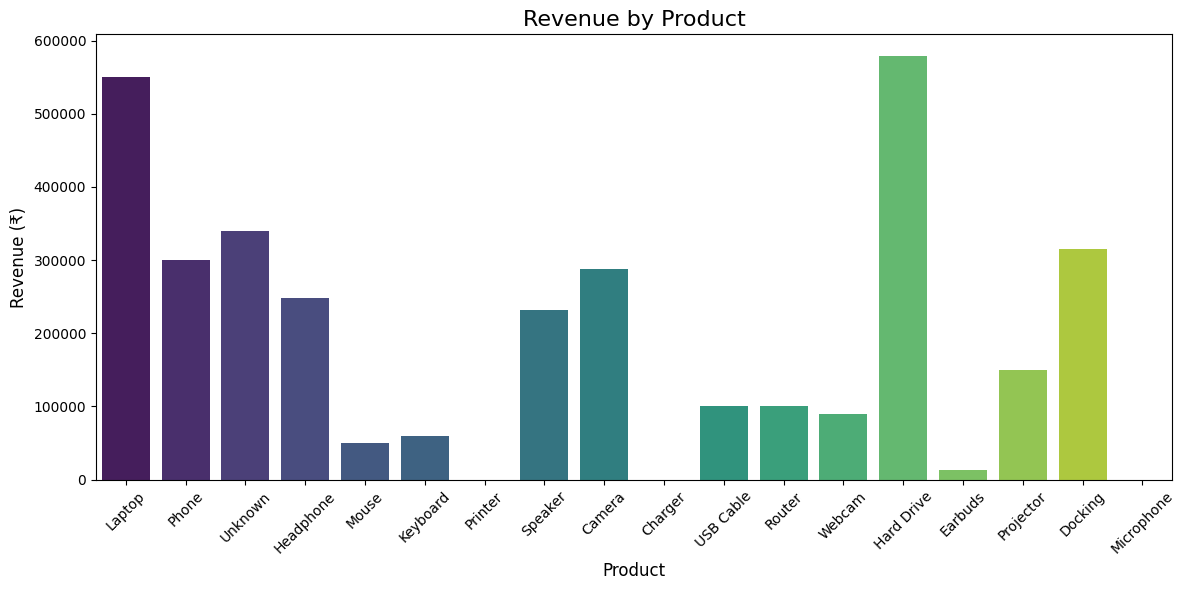

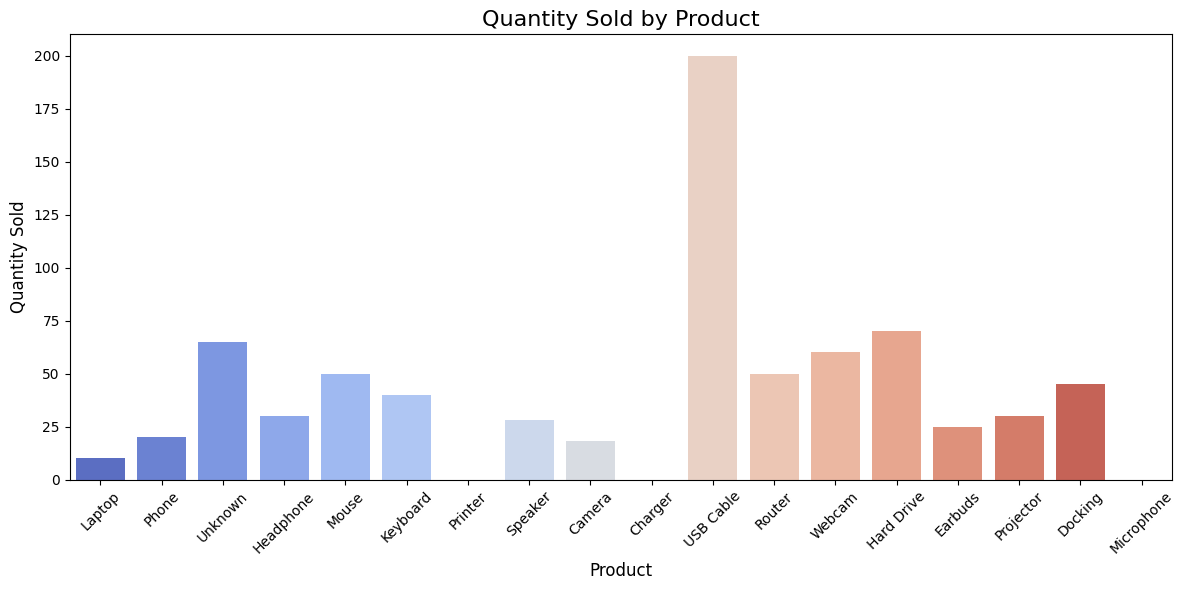

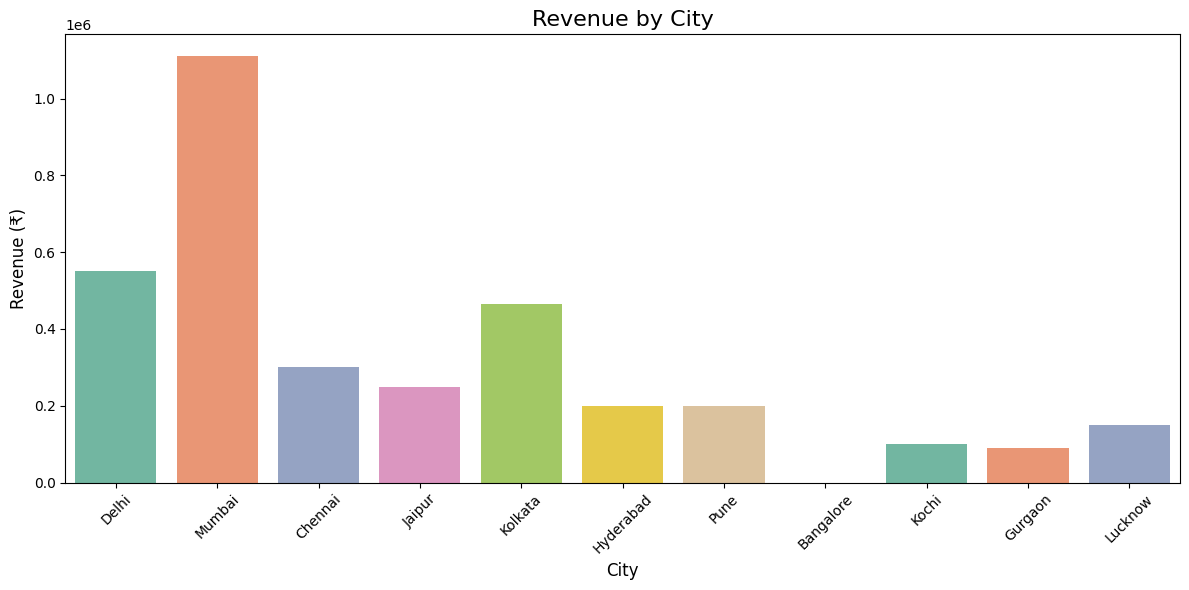

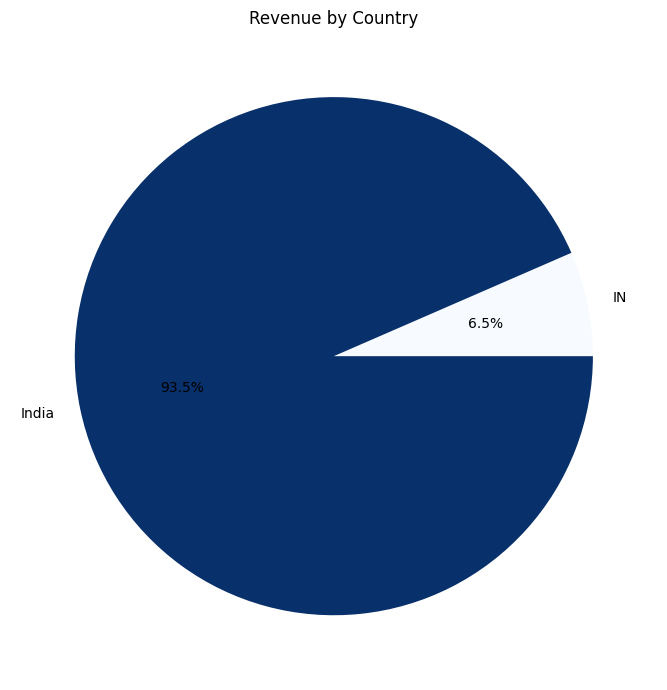

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Dataset
data = {
    "Customer_Name": ["Rahul Kumar", "Priya Sharma", "Unknown", "Anjali Reddy", "Aman Verma", "Meera Iyer",
                      "Rajesh Singh", "Sunil Patel", "Rina Bhatia", "Unknown", "Kiran Verma", "Neha Agarwal",
                      "Ravi Prasad", "Seema Rathi", "Unknown", "Deepa Iyer", "Harish Rao", "Priya Yadav",
                      "Aman Soni", "Unknown"],
    "Product": ["Laptop", "Phone", None, "Headphone", "Mouse", "Keyboard", None, "Printer", "Speaker", "Camera",
                "Charger", "USB Cable", None, "Router", "Webcam", "Hard Drive", "Earbuds", "Projector",
                "Docking", "Microphone"],
    "Quantity_Sold": [10, 20, 0, 30, 50, 40, 25, 0, 28, 18, 0, 200, 40, 50, 60, 70, 25, 30, 45, 0],
    "Price": [55000, 15000, 7000, None, 1000, 1500, 8000, 8000, None, 16000, None, 500, 3500, 2000, 1500, None, 500,
              5000, 7000, 1000],
    "Date": ["01-11-2024", "02-11-2024", "03-11-2024", "04-11-2024", "05-11-2024", "06-11-2024", "Unknown",
             "08-11-2024", "09-11-2024", "10-11-2024", "11-11-2024", "12-11-2024", "13-11-2024", "14-11-2024",
             "15-11-2024", "16-11-2024", "17-11-2024", "Unknown", "19-11-2024", "Unknown"],
    "City": ["Delhi", "Mumbai", "Chennai", "Jaipur", "Kolkata", "Hyderabad", "Pune", "Delhi", "Mumbai", "Chennai",
             "Bangalore", "Kolkata", "Hyderabad", "Kochi", "Gurgaon", "Mumbai", "Chennai", "Lucknow", "Kolkata", None],
    "State": ["Delhi", "Maharashtra", "Tamil Nadu", "Rajasthan", "West Bengal", "Telangana", "Maharashtra",
              "Delhi", "Maharashtra", "Tamil Nadu", "Karnataka", "West Bengal", "Telangana", "Kerala", "Haryana",
              "Maharashtra", "Tamil Nadu", "Uttar Pradesh", "West Bengal", None],
    "Country": ["India", "India", "IN", "India", "India", "India", "India", "India", "India", "India", "India",
                "IN", "India", "India", "IN", "India", "IN", "India", None, None]
}

# Create DataFrame
df = pd.DataFrame(data)

# Clean Missing Values
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert Price to numeric
df['Price'] = df['Price'].fillna(df['Price'].mean())  # Fill missing prices with the mean

df['Quantity_Sold'] = df['Quantity_Sold'].fillna(0)  # Fill missing Quantity_Sold with 0
df['Product'] = df['Product'].fillna('Unknown')  # Replace missing products with 'Unknown'

# Calculate Revenue
df['Revenue'] = df['Quantity_Sold'] * df['Price']

# Replace invalid dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime, replace invalid dates with NaT
df['Date'] = df['Date'].fillna(pd.Timestamp('2024-01-01'))  # Fill NaT with a default date

# Revenue by Product
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Product', y='Revenue', estimator=sum, errorbar=None, palette='viridis')
plt.title("Revenue by Product", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Revenue (₹)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Quantity Sold by Product
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Product', y='Quantity_Sold', estimator=sum, errorbar=None, palette='coolwarm')
plt.title("Quantity Sold by Product", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Revenue by City
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='City', y='Revenue', estimator=sum, errorbar=None, palette='Set2')
plt.title("Revenue by City", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Revenue (₹)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Revenue by Country (Pie Chart)
country_revenue = df.groupby('Country')['Revenue'].sum()
plt.figure(figsize=(7, 7))
country_revenue.plot(kind='pie', autopct='%1.1f%%', cmap='Blues')
plt.title("Revenue by Country")
plt.ylabel("")  # Hide the ylabel
plt.tight_layout()

# Show all plots
plt.show()


# *Conclusion*

* The dataset requires significant cleaning to make it analysis-ready.
* Data quality issues like missing values, typos, duplicates, and inconsistencies in formatting need to be resolved.
* Despite the messy data, trends indicate that high-ticket items like laptops and phones drive revenue, while consumables like USB cables dominate in sales volume.
* Geographic data suggests India as the target market with room for regional analysis upon proper cleaning.


# *Recommendations*

Data Cleaning:
* Fill missing values in Customer_Name with "Unknown" and impute missing values for Price using product averages.
* Standardize text fields (e.g., Country to "India") and fix typos in Product.
* Replace invalid dates with a standard value (e.g., "2024-01-01") or estimate based on surrounding data.

Duplicate Removal:
* Identify and merge duplicate customer entries by standardizing Customer_Name.

Insights for Business Strategy:
* Increase the stock of high-selling products like USB Cables and Mouse.
* Focus marketing efforts on high-revenue products like Laptops and Phones.

Operational Improvements:
* Automate data validation checks during data entry to avoid future issues with invalid dates or inconsistent text formatting.
* Implement a structured data collection system to reduce missing values and typos.


Future Analysis:
* Conduct a regional sales analysis post-cleaning to identify potential expansion areas.
* Analyze customer purchasing patterns to tailor loyalty programs and targeted promotions.
* Perform predictive analysis to forecast future sales trends.
* Explore customer demographics for targeted marketing strategies.